Importing the libraries: 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, lets get the file and see the columns and types of them

In [49]:
wine = pd.read_csv("winequality-red.csv")
rownum, colnum = wine.shape
colnames = list(wine.columns)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 12 variables, 11 of them are numeric. <br>
The final variable "quality" is in fact categorical though it is in integer format. <br>
Later, we will categorize that variable to fit a classification model. <br>
<br>
Now we check the estimates of location and variability both by describe function <br>
This will give us an idea about the variables. 

In [50]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We then check the first rows: 

In [51]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


How many of each value for the "quality" variable:

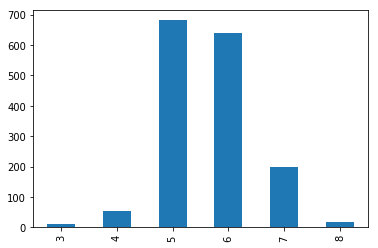

In [52]:
wine["quality"].value_counts().sort_index().plot(kind='bar')

Wine with quality value of 8 is very rare. Most of the wines are valued 5 or 6. <br>
We now plot the histogram for each variable to have a general idea of their distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139DB3F0BE0>,
      dtype=object)

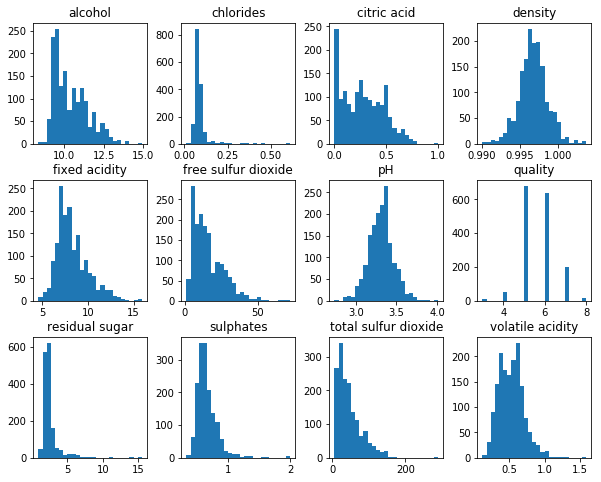

In [53]:
wine.hist(layout=(3,4),grid=False,figsize=(10,8),bins=25)

From the histograms, we may say that there are various of distributions. <br>
We don't see clustering around a value, so to say we detect no reduntant variable. <br>
<br>
Now we plot bar charts of variables by the "quality" variable <br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000139DB7A9B38>,
      dtype=object)

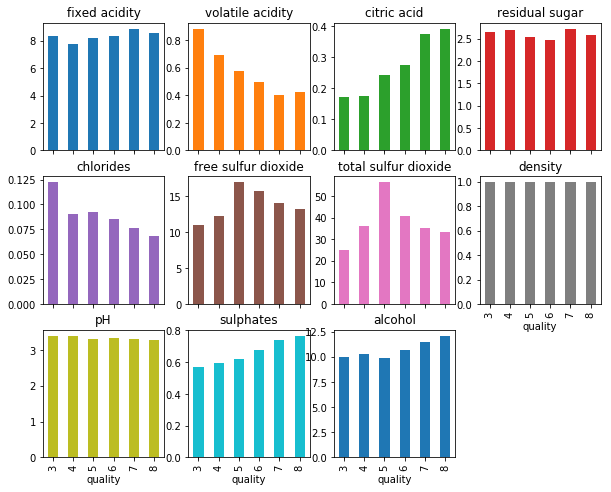

In [54]:
wine.groupby(['quality'])[colnames[0:11]].mean().plot.bar(subplots=True,layout=(3, 4),figsize=(10,8),legend=False)

There seems to be a kind of relationship between Citric Acid and Quality <br>
And between Volatile Acidity and Quality <br>
Yet, we just compared the mean values in the bar plots <br>
We better have a look at the scatterplot to see the actual points of data

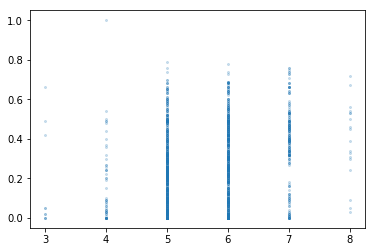

In [55]:
plt.plot(wine["quality"],wine["citric acid"],"o",markersize=2,alpha=0.2)

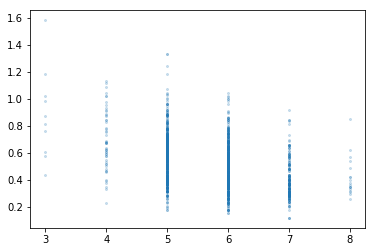

In [56]:
plt.plot(wine["quality"],wine["volatile acidity"],"o",markersize=2,alpha=0.2)

Judging from the scatterplot we can hardly derive a relationship between the <br>
variables and the Quality, because there are not enough instances of the <br>
wine with quality value of 7 and 8 <br>
<br>
Now, to set a classification model, <br>
we name the Quality values of 7 and 8 "good" and others "bad"

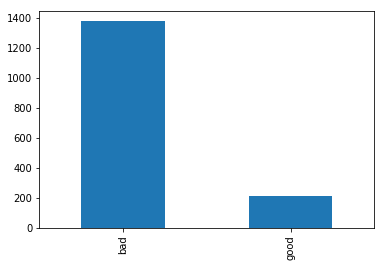

In [57]:
wine.loc[wine.quality <= 6, "quality"] = 0
wine.loc[wine.quality > 6, "quality"] = 1
wine["quality"] = np.where(wine["quality"]<1, "bad", "good")
wine["quality"].value_counts().sort_index().plot(kind="bar")

Now we may see the correlation among the variables <br>
by using a heatmap representation of correlation matrix

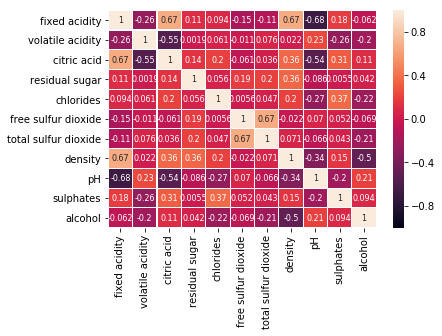

In [58]:
corr = wine.corr()
sns.heatmap(corr, vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8});

We may also plot stronger correlations only, like between -0.3 and 0.3

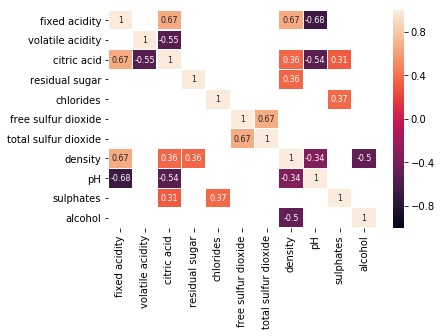

In [59]:
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8});